## Detection of Skewness ans it's removal in data using python

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("USA_cars_datasets.csv")
data.head(2)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left


In [71]:
#Removing the unnamed: 0 column
data = data.drop(['Unnamed: 0'], axis = 1)
data.head(2)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left


In [72]:
#Exploring the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [73]:
data.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [74]:
#checking dimension of dataset
data.shape

(2499, 12)

<Axes: >

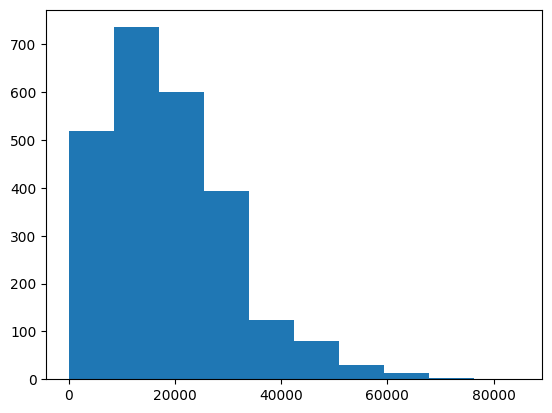

In [75]:
#importing library for visualising dataset and plotting the  histogram for  price attributes
import seaborn as sns
data['price'].hist(grid=False)

In [76]:
#checking skewness of Price Column of dataset
data['price'].skew()

0.9227307836499805

C:\Users\rahul\AppData\Local\Temp\ipykernel_1956\1795920049.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], hist = True)


<Axes: xlabel='price', ylabel='Density'>

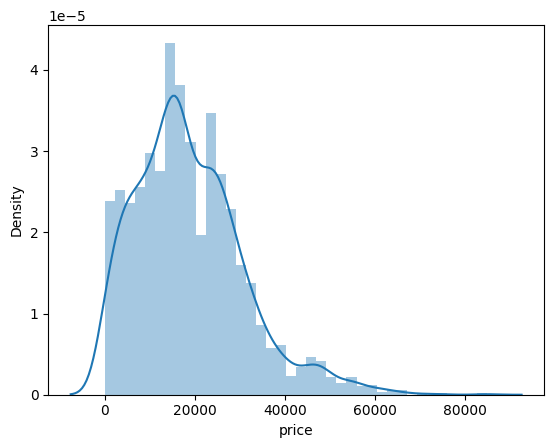

In [77]:
#density plot
sns.distplot(data['price'], hist = True)

In [78]:
# Checking the skewness of mileage column of dataset
data['mileage'].skew()

7.0793210165347915

C:\Users\rahul\AppData\Local\Temp\ipykernel_1956\1388293605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mileage'], hist = True)


<Axes: xlabel='mileage', ylabel='Density'>

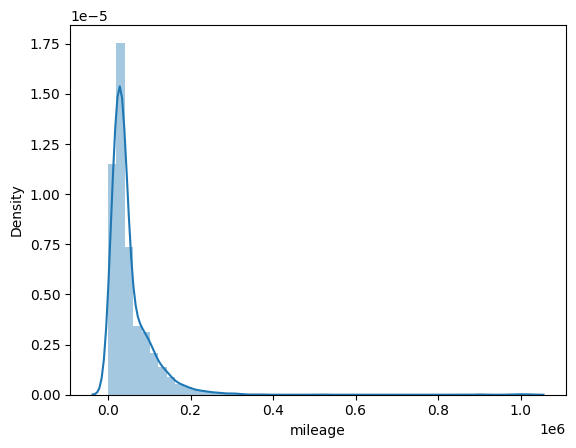

In [79]:
sns.distplot(data['mileage'], hist = True)

logarithmic tranformation

In [80]:
#performing the log transformation using numpy
log_mileage = np.log(data['mileage'])
log_mileage

c:\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       12.521310
1       12.157680
2       10.586332
3       11.068917
4        8.802973
          ...    
2494    10.069383
2495    10.450250
2496    10.360723
2497    10.390748
2498    10.353639
Name: mileage, Length: 2499, dtype: float64

In [81]:
log_mileage.skew()

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan

It's giving us nan because there are some values as the zero. In log transformation, it deals with only the positive and negative numbers not with zero.

Square Root Transformation

In [82]:
sq_mileage = np.sqrt(data['mileage'])
sq_mileage

0       523.561840
1       436.522623
2       198.972360
3       253.270606
4        81.572054
           ...    
2494    153.652205
2495    185.884373
2496    177.747011
2497    180.435584
2498    177.118604
Name: mileage, Length: 2499, dtype: float64

In [83]:
sq_mileage.skew()

1.6676282633339148

C:\Users\rahul\AppData\Local\Temp\ipykernel_1956\991164311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sq_mileage,hist=True)


<Axes: xlabel='mileage', ylabel='Density'>

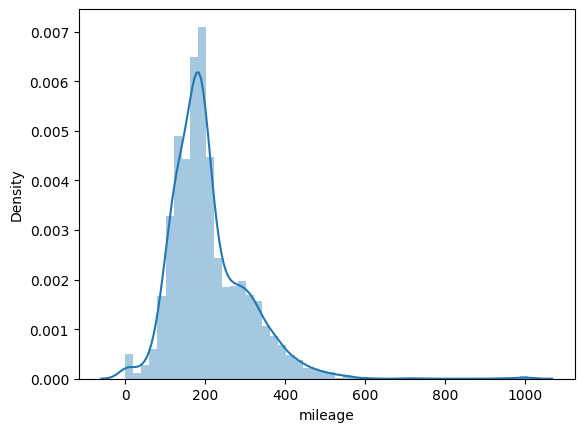

In [84]:
sns.distplot(sq_mileage,hist=True)

Cuberoot Transformation

In [85]:
cube_mileage = np.cbrt(data['mileage'])
cube_mileage

0       64.959896
1       57.544590
2       34.082269
3       40.030394
4       18.808793
          ...    
2494    28.687489
2495    32.570812
2496    31.613181
2497    31.931167
2498    31.538627
Name: mileage, Length: 2499, dtype: float64

In [86]:
cube_mileage.skew()

0.6866069687334178

C:\Users\rahul\AppData\Local\Temp\ipykernel_1956\729902305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cube_mileage, hist=True)


<Axes: xlabel='mileage', ylabel='Density'>

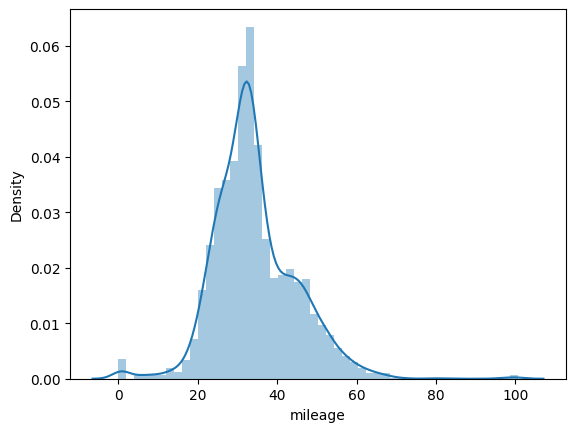

In [87]:
sns.distplot(cube_mileage, hist=True)

Reciprocal Tranformation

In [88]:
rec_mileage = np.reciprocal(data['mileage'])
rec_mileage

c:\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       0.000004
1       0.000005
2       0.000025
3       0.000016
4       0.000150
          ...   
2494    0.000042
2495    0.000029
2496    0.000032
2497    0.000031
2498    0.000032
Name: mileage, Length: 2499, dtype: float64

In [89]:
rec_mileage.skew()

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan

Note: It's giving output as nan because there are some values as the zero. In reciprocal transformation, it's good deal with negative numbers not with zero.